TIME SERIES - ARIMA

In [22]:
#import libraries
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
import time
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


In [23]:
#Get the stock quote, shape (rows and columns) of the dataset
df=web.DataReader('TSLA', data_source='yahoo', start='2015-01-01', end='2021-12-31')

df.head(2)
df.shape


(1763, 6)

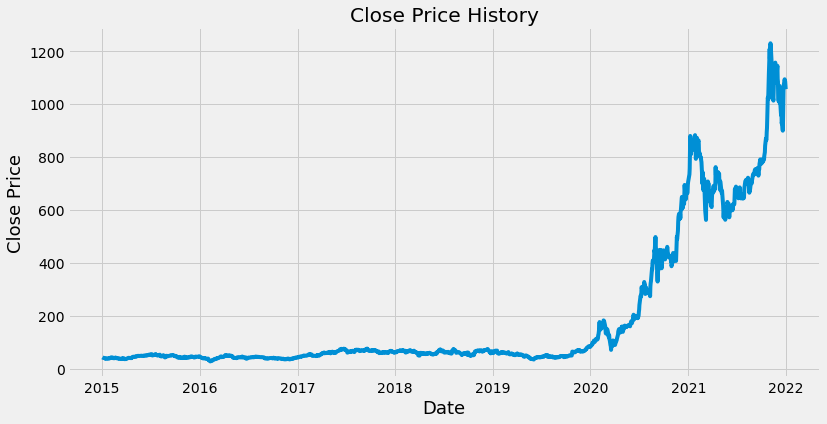

In [24]:
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [25]:
dp=web.DataReader('PLTR', data_source='yahoo', start='2015-01-01', end='2021-12-31')
da=web.DataReader('ASML', data_source='yahoo', start='2015-01-01', end='2021-12-31')
ds=web.DataReader('SQ', data_source='yahoo', start='2015-01-01', end='2021-12-31')
dr=web.DataReader('RBLX', data_source='yahoo', start='2015-01-01', end='2021-12-31')
dm=web.DataReader('AMD', data_source='yahoo', start='2015-01-01', end='2021-12-31')
dn=web.DataReader('NVDA', data_source='yahoo', start='2015-01-01', end='2021-12-31')
dp.head(2)
da.head(2)
ds.head(2)
dr.head(2)
dm.head(2)
dn.head(2)



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,5.0700,4.9525,5.0325,5.0325,11368000.0,4.839471
2015-01-05,5.0475,4.9250,5.0325,4.9475,19795200.0,4.757730


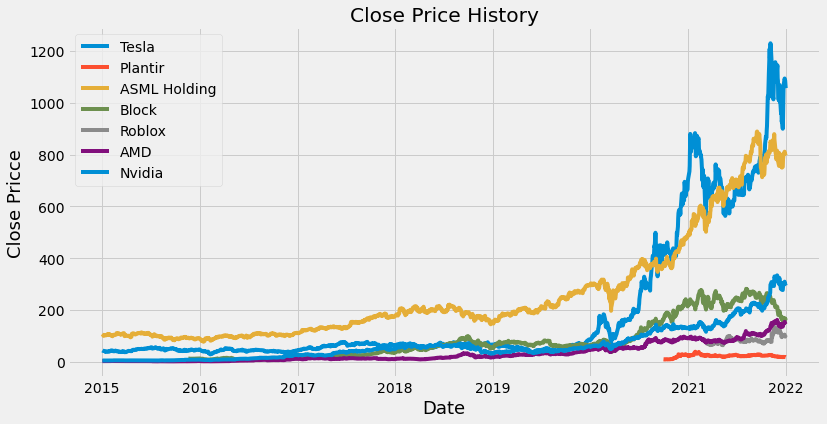

In [26]:
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.plot(dp['Close'])
plt.plot(da['Close'])
plt.plot(ds['Close'])
plt.plot(dr['Close'])
plt.plot(dm['Close'])
plt.plot(dn['Close'])
plt.legend(['Tesla','Plantir','ASML Holding','Block','Roblox','AMD','Nvidia'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Pricce', fontsize=18)
plt.show()

In [27]:
# check if price series is stationary
from IPython.core.debugger import set_trace
from statsmodels.tsa.stattools import adfuller

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001


In [28]:
result = adfuller(df['Close'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 0.8373003793038198
p-value: 0.9922150203468294


In [29]:
#ACF
from statsmodels.graphics.tsaplots import plot_acf


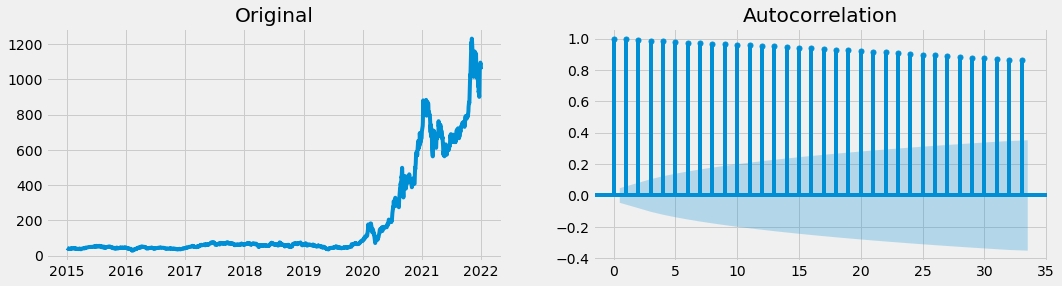

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(df['Close'])
ax1.set_title("Original")
#add; at the end of the plot function so that the plot is not duplicated
plot_acf(df['Close'], ax=ax2);

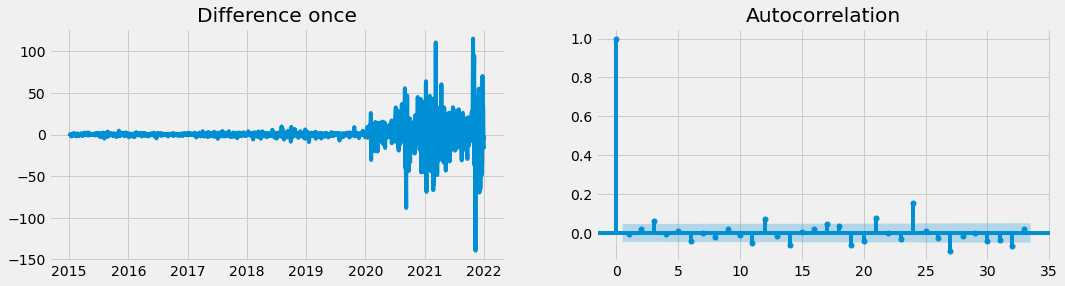

In [31]:
diff=df['Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
#add; at the end of the plot function so that the plot is not duplicated
plot_acf(diff, ax=ax2);

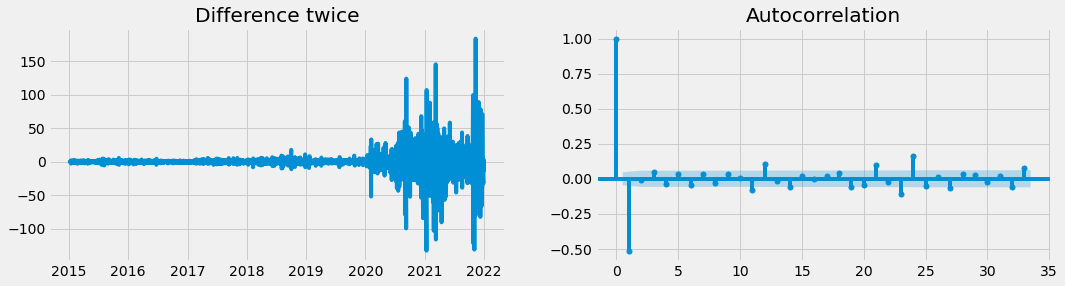

In [32]:
diff=df['Close'].diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")
#add; at the end of the plot function so that the plot is not duplicated
plot_acf(diff, ax=ax2);

In [33]:
from pmdarima.arima.utils import ndiffs 

ndiffs(df['Close'], test='adf')

1

P

P is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags.

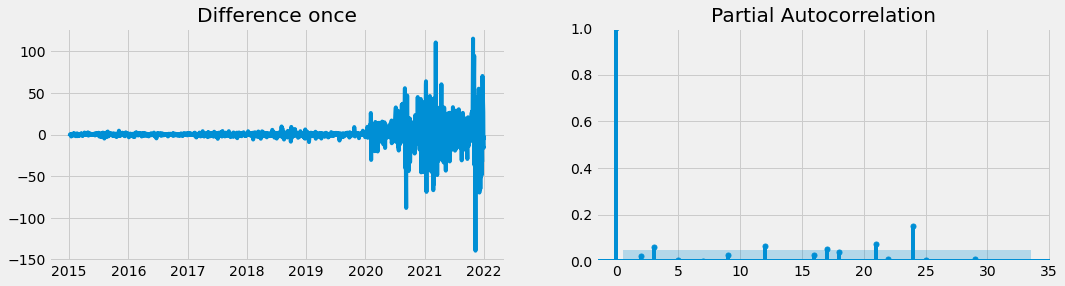

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf
#plot pacf
diff = df['Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

q

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA model.

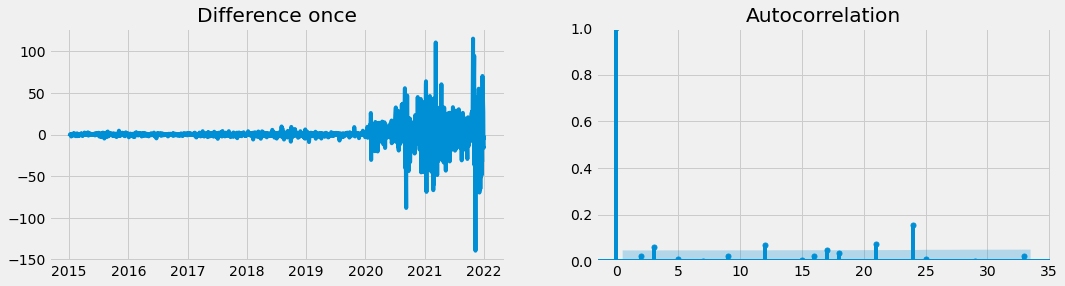

In [35]:
#Plot acf
diff = df['Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

Fitting the ARIMA model

In [36]:
from statsmodels.tsa.arima_model import ARIMA
#ARIMA model

model = ARIMA(df['Close'], order=( 3, 1, 3))
result = model.fit(disp=0)

C:\Users\olowe_m\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\olowe_m\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

In [37]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1762
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -6908.498
Method:                       css-mle   S.D. of innovations             12.185
Date:                Wed, 09 Feb 2022   AIC                          13832.995
Time:                        08:50:04   BIC                          13876.789
Sample:                             1   HQIC                         13849.179
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5724      0.299      1.916      0.055      -0.013       1.158
ar.L1.D.Close     0.3433      0.005     68.424      0.000       0.333       0.353
ar.L2.D.Close     0.3542      0.005     

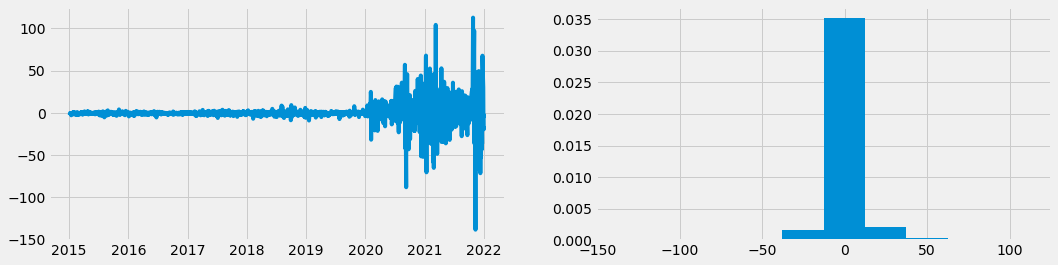

In [38]:
#Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, density=True);

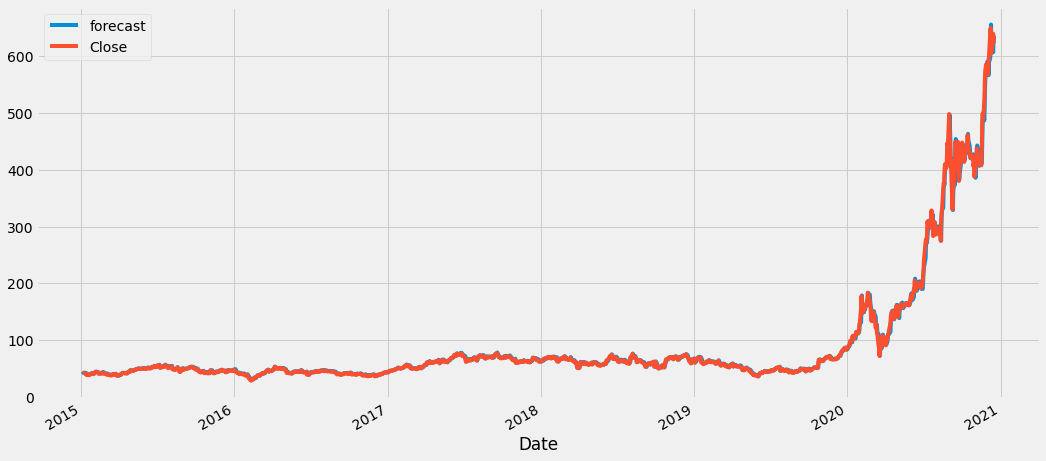

In [39]:
# Actual vs Fitted
fig, (ax1) = plt.subplots(1, figsize=(16,8))

result.plot_predict(
    start=1,
    end=1500,
    dynamic=False,
    ax=ax1
);

Long Short Term Memory (LSTM)

In [41]:
n = int(len(df) * 0.8)

train = df['Close'][:n]
test = df['Close'][n:]

print(len(train))
print(len(test))

1410
353


In [42]:
print((train))
print((test))

Date
2015-01-02     43.862000
2015-01-05     42.018002
2015-01-06     42.256001
2015-01-07     42.189999
2015-01-08     42.124001
                 ...    
2020-08-03    297.000000
2020-08-04    297.399994
2020-08-05    297.003998
2020-08-06    297.915985
2020-08-07    290.541992
Name: Close, Length: 1410, dtype: float64
Date
2020-08-10     283.713989
2020-08-11     274.877991
2020-08-12     310.951996
2020-08-13     324.200012
2020-08-14     330.141998
                 ...     
2021-12-27    1093.939941
2021-12-28    1088.469971
2021-12-29    1086.189941
2021-12-30    1070.339966
2021-12-31    1056.780029
Name: Close, Length: 353, dtype: float64


In [43]:
model = ARIMA(train, order=(3, 1, 3))
result = model.fit(disp=0);
print(result.summary())

C:\Users\olowe_m\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\olowe_m\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1409
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3722.681
Method:                       css-mle   S.D. of innovations              3.398
Date:                Wed, 09 Feb 2022   AIC                           7461.363
Time:                        08:52:08   BIC                           7503.368
Sample:                             1   HQIC                          7477.060
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1745      0.119      1.469      0.142      -0.058       0.407
ar.L1.D.Close    -0.5721      0.089     -6.460      0.000      -0.746      -0.399
ar.L2.D.Close     0.4069      0.110     

In [44]:
step = 30

fc, se, conf = result.forecast(step)
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)

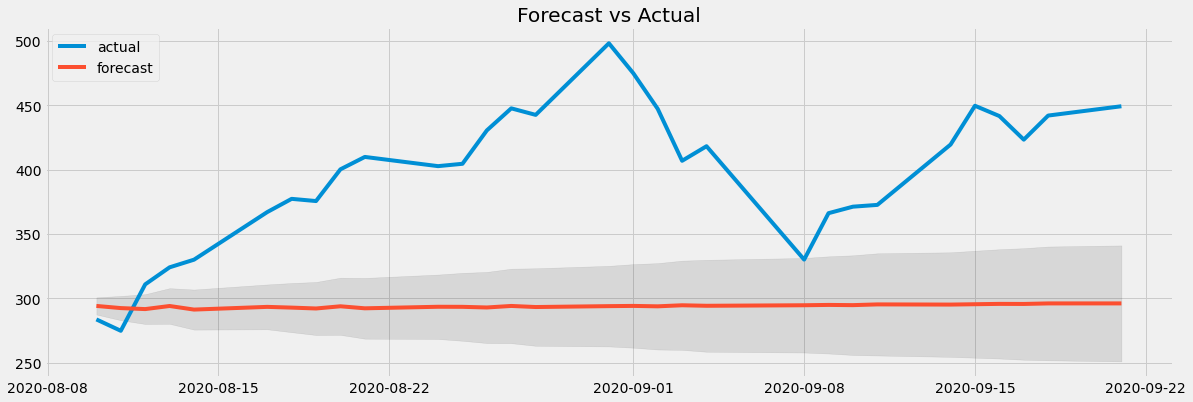

In [45]:
plt.figure(figsize=(18,6))
plt.plot(test[:step], label='actual')
plt.plot(fc, label='forecast')
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title('Forecast vs Actual')
plt.legend(loc='upper left')


LSTM - Method 2

In [49]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1763 entries, 2015-01-02 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1763 non-null   float64
 1   Low        1763 non-null   float64
 2   Open       1763 non-null   float64
 3   Close      1763 non-null   float64
 4   Volume     1763 non-null   float64
 5   Adj Close  1763 non-null   float64
dtypes: float64(6)
memory usage: 96.4 KB


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001


In [50]:
#create a new dataframe with only the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1411

In [52]:
#scale data

scaler =MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01259432],
       [0.01105916],
       [0.0112573 ],
       ...,
       [0.88035052],
       [0.86715513],
       [0.85586625]])

In [53]:
#create the train dataset
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#split the data into x_train and y_train data sets
X_train = [] #independant variables
y_train = [] #dependant variables

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(X_train)
        print(y_train)
        print()
        
print(len(X_train))
print(len(y_train))

[array([0.01259432, 0.01105916, 0.0112573 , 0.01120235, 0.01114741,
       0.01048806, 0.00974712, 0.01008678, 0.008162  , 0.00802547,
       0.00822527, 0.00803546, 0.00880803, 0.00964888, 0.00959393,
       0.01046974, 0.01037483, 0.00927425, 0.01024496, 0.00997856,
       0.01120069, 0.01243615, 0.01246778, 0.01287405, 0.01226964,
       0.01228962, 0.01209148, 0.01151039, 0.00985867, 0.01000686,
       0.01010343, 0.01012175, 0.0113289 , 0.01222802, 0.01060128,
       0.01006347, 0.01000519, 0.0105763 , 0.00993526, 0.00893458,
       0.00930588, 0.00978541, 0.00948404, 0.00836014, 0.00786063,
       0.00776739, 0.00833683, 0.00789227, 0.00749432, 0.00866318,
       0.00850167, 0.00949736, 0.00865485, 0.00905946, 0.00931753,
       0.00966553, 0.00843007, 0.00778237, 0.00688159, 0.00780901])]
[0.007509309295916578]

[array([0.01259432, 0.01105916, 0.0112573 , 0.01120235, 0.01114741,
       0.01048806, 0.00974712, 0.01008678, 0.008162  , 0.00802547,
       0.00822527, 0.00803546, 0.0

In [54]:
#convert the x_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

#reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape


(1351, 60, 1)

In [55]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50, return_sequences=False)) 
model.add(Dense(25)) 
model.add(Dense(1))


In [56]:
#compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [57]:
#train the model

model.fit(X_train, y_train, batch_size=1, epochs=1)

1351/1351 [==============================] - 35s 23ms/step - loss: 2.2393e-04 0s - loss


In [58]:
#creat the testing data set

#creat a new array containing scalled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [59]:
#convert data into to a numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(352, 60, 1)

In [60]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [61]:
#evaluate the model - RMSE
rsme = np.sqrt(np.mean(predictions - y_test)**2)
rsme

347.98693917014384

<ipython-input-62-cd9db7a2edf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


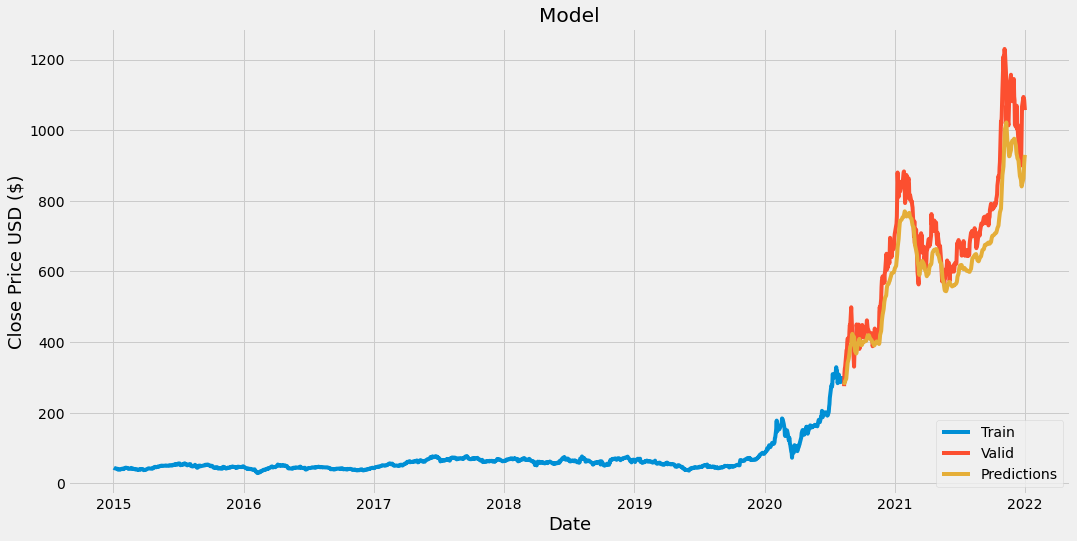

In [62]:
#plot the data
train =data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [63]:
#show valid and predicted prices
valid

,Close,Predictions
Date,,
2020-08-11,274.877991,286.497559
2020-08-12,310.951996,283.430939
2020-08-13,324.200012,284.773926
2020-08-14,330.141998,289.512115
2020-08-17,367.127991,295.766602
...,...,...
2021-12-27,1093.939941,863.007751
2021-12-28,1088.469971,885.077637
2021-12-29,1086.189941,905.110779


In [64]:
#Get the quote
quote=web.DataReader('TSLA', data_source='yahoo', start='2015-01-01', end='2021-12-31')

#create a new dataframe
new_df=quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#create an empty list
X_test = []

#append the past 60 days
X_test.append(last_60_days_scaled)

#convert the X_tesr data to numpy array
X_test = np.array(X_test)

#Reshape the datat
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[933.138]]


In [65]:
#Get the quote
quote2=web.DataReader('TSLA', data_source='yahoo', start='2021-12-31', end='2021-12-31')
print(quote2['Close'])

Date
2021-12-31    1056.780029
Name: Close, dtype: float64


Stock Prediction Using CNN

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
#prepare the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

prediction_days = 120

In [68]:
X_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    X_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [69]:
#build the model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True)) 
model.add(Dropout(0.2))
model.add(LSTM(50)) 
model.add(Dropout(0.2))
model.add(Dense(1)) 


In [70]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
52/52 [==============================] - 11s 128ms/step - loss: 0.0088
Epoch 2/25
52/52 [==============================] - 8s 157ms/step - loss: 0.0019
Epoch 3/25
52/52 [==============================] - 7s 143ms/step - loss: 0.0020
Epoch 4/25
52/52 [==============================] - 8s 159ms/step - loss: 0.0018
Epoch 5/25
52/52 [==============================] - 8s 149ms/step - loss: 0.0017
Epoch 6/25
52/52 [==============================] - 8s 163ms/step - loss: 0.0016
Epoch 7/25
52/52 [==============================] - 8s 161ms/step - loss: 0.0015
Epoch 8/25
52/52 [==============================] - 9s 168ms/step - loss: 0.0016
Epoch 9/25
52/52 [==============================] - 9s 180ms/step - loss: 0.0014
Epoch 10/25
52/52 [==============================] - 7s 138ms/step - loss: 0.0014
Epoch 11/25
52/52 [==============================] - 8s 159ms/step - loss: 0.0016
Epoch 12/25
52/52 [==============================] - 7s 139ms/step - loss: 0.0014
Epoch 13/25
52/52 [=====

In [88]:
#Test the model accuracy on existing data

test_data=web.DataReader('TSLA', data_source='yahoo', start='2015-01-01', end='2022-02-08')
actual_prices = test_data['Close'].values

In [89]:
total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset)- len(test_data)- prediction_days:].values

model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


In [90]:
#make predictions on test data

x_test = []
for x in range(prediction_days, len(model_inputs), len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [91]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

<ipython-input-92-0002fec57ed4>:5: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('actual','predicted')
<ipython-input-92-0002fec57ed4>:5: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('actual','predicted')
<ipython-input-92-0002fec57ed4>:5: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('actual','predicted')
<ipython-input-92-0002fec57ed4>:5: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/

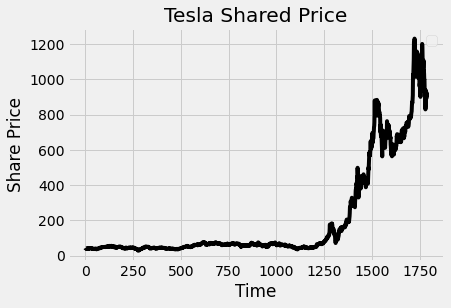

In [92]:
#plot the test predictions
plt.plot(actual_prices, color='black')
plt.plot(predicted_prices, color='red')
plt.title('Tesla Shared Price')
plt.legend('actual','predicted')
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.show()

In [93]:
#predict next day

real_data = [model_inputs[len(model_inputs)-prediction_days:len(model_inputs),0]]
real_data = np.array(real_data)

real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))


In [94]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print(f"Prediction: {prediction}")

Prediction: [[910.1649]]
